# seaborn histplot 函数详解

`sns.histplot()` 是 seaborn 库中用于绘制直方图的函数，它提供了比 matplotlib 基础直方图更丰富的功能和更美观的可视化效果。下面我将详细介绍这个函数的用法和参数。

## 基本语法

```python
sns.histplot(data=None, *, x=None, y=None, hue=None, weights=None, 
             stat='count', bins='auto', binwidth=None, binrange=None, 
             discrete=None, cumulative=False, common_bins=True, 
             common_norm=True, multiple='layer', element='bars', 
             fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, 
             thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, 
             cbar_kws=None, palette=None, hue_order=None, hue_norm=None, 
             color=None, log_scale=None, legend=True, ax=None, **kwargs)
```

## 主要参数说明

### 数据相关参数

1. **data**: 输入数据结构，可以是 DataFrame、数组、列表或类似数组的对象
2. **x, y**: 指定要绘制直方图的变量
   - 通常只使用 x 或 y 中的一个，绘制单变量直方图
   - 可以同时使用 x 和 y 绘制双变量直方图（2D直方图）
3. **hue**: 用于分组的分类变量，将为每个类别绘制不同颜色的直方图

### 分箱控制参数

4. **bins**: 控制直方图的分箱方式
   - 可以是整数（指定箱数）、序列（指定箱边界）或字符串（指定计算箱数的方法）
   - 常用字符串值: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'
5. **binwidth**: 直接指定每个箱的宽度
6. **binrange**: 指定直方图的范围（最小值和最大值）
7. **discrete**: 如果为 True，则将数据视为离散数据，每个整数一个箱

### 统计计算参数

8. **stat**: 指定直方图显示的统计量
   - 'count': 显示每个箱中的观测数（默认）
   - 'frequency': 显示观测频率（每个箱中的观测数除以箱宽度）
   - 'density': 标准化为形成概率密度（面积总和为1）
   - 'probability': 标准化为形成概率（高度总和为1）
   - 'percent': 标准化为形成百分比（高度总和为100）
9. **cumulative**: 如果为 True，则绘制累积直方图
10. **kde**: 如果为 True，则添加核密度估计曲线

### 外观控制参数

11. **element**: 直方图的显示形式
    - 'bars': 传统条形（默认）
    - 'step': 无填充的阶梯图
    - 'poly': 频数多边形
12. **fill**: 是否填充直方图条
13. **palette**: 调色板名称、列表或字典，用于 hue 变量的颜色
14. **color**: 设置所有元素的颜色（除非使用 hue）
15. **multiple**: 当使用 hue 时，控制多个直方图的排列方式
    - 'layer': 叠加（默认）
    - 'dodge': 并排
    - 'stack': 堆叠
    - 'fill': 堆叠并标准化为100%

## 使用示例

### 基本直方图

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
sns.histplot(data=tips, x='total_bill')
plt.show()
```

### 添加核密度估计

```python
sns.histplot(data=tips, x='total_bill', kde=True)
plt.show()
```

### 分组直方图

```python
sns.histplot(data=tips, x='total_bill', hue='time', multiple='dodge')
plt.show()
```

### 改变统计量显示

```python
sns.histplot(data=tips, x='total_bill', stat='density')
plt.show()
```

### 2D直方图

```python
sns.histplot(data=tips, x='total_bill', y='tip')
plt.show()
```

### 自定义分箱

```python
sns.histplot(data=tips, x='total_bill', bins=20, binrange=(0, 60))
plt.show()
```

### 阶梯式直方图

```python
sns.histplot(data=tips, x='total_bill', element='step', fill=False)
plt.show()
```

## 注意事项

1. histplot 比传统的 matplotlib hist 函数更灵活，提供了更多的统计计算选项
2. 当数据中有大量离群值时，可以尝试调整 binrange 或使用对数尺度
3. 对于大数据集，可以使用 binwidth 参数而不是 bins 来获得更一致的结果
4. 当使用 hue 参数时，multiple 参数可以控制不同类别直方图的排列方式

通过合理组合这些参数，可以创建出信息丰富且美观的直方图来探索数据的分布特征。

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

这段代码使用Seaborn和Matplotlib创建了一个堆叠式直方图，用于可视化钻石价格在不同切工等级(cut)下的分布情况。

,carat,cut,color,clarity,depth,table,price,x,y,z
51814,0.76,Very Good,H,SI2,59.8,58.0,2418,5.94,5.96,3.56
26423,2.05,Very Good,H,SI2,62.4,58.0,15949,8.10,8.15,5.07
36429,0.31,Ideal,D,VS2,61.6,57.0,942,4.38,4.36,2.69
25100,1.50,Very Good,D,VS2,63.8,55.0,13629,7.24,7.28,4.63
29890,0.30,Ideal,E,VS1,60.7,57.0,710,4.31,4.36,2.63
12189,1.09,Premium,D,SI2,60.3,60.0,5186,6.68,6.61,4.01
18395,1.51,Good,J,VS2,59.5,61.0,7476,7.45,7.62,4.48
19809,1.00,Good,D,VVS2,60.2,62.0,8374,6.42,6.46,3.88
24092,1.75,Premium,E,SI2,60.9,59.0,12238,7.78,7.75,4.73
53225,0.90,Fair,E,SI2,64.4,58.0,2639,6.07,6.01,3.89


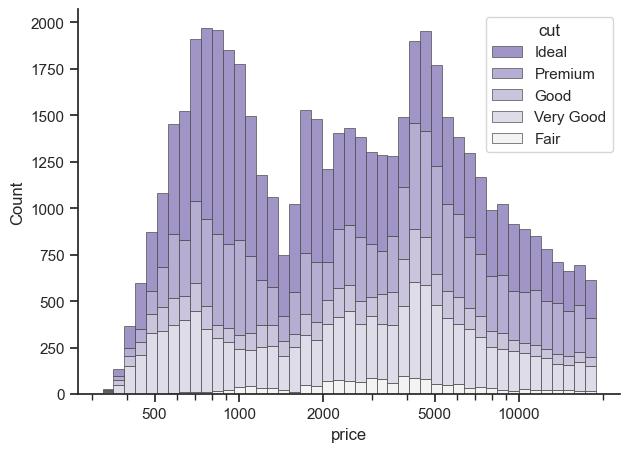

In [5]:
sns.set_theme(style="ticks")
# 从Seaborn的示例数据集中加载"diamonds"数据集
# 这是一个包含53940颗钻石信息的DataFrame，包含价格、克拉重量、切工等特征
diamonds = pd.read_csv("seaborn-data/diamonds.csv")
display(diamonds.sample(10))

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",       # 不同切工等级的直方图堆叠显示
    palette="light:m_r",    # 使用从浅色到红色的渐变色
    edgecolor=".3",         # 设置条形边缘颜色为深灰色(30%黑)
    linewidth=.5,
    log_scale=True,         # x轴使用对数刻度(因为价格分布通常右偏)
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())  # 确保刻度显示为常规数字而非科学计数法
ax.set_xticks([500, 1000, 2000, 5000, 10000])